In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from load_data import get_data

In [2]:
x_train, y_train, x_pred = get_data()

C:\Users\gango\Projects\ADA\load_data.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  alldf = pd.concat([train_df,test_df])


Training set size: (24584, 57)


In [4]:
from sklearn.neighbors import *

In [16]:
%%time
res = {}
for weights in ['uniform', 'distance']:
    n_neighbors = [100, 110, 120, 130, 140]
    param_grid = {'n_neighbors': n_neighbors}
    clf = GridSearchCV(KNeighborsClassifier(weights=weights),
                       scoring='roc_auc',
                       param_grid=param_grid, cv=5, n_jobs=4,
                       verbose=5)
    clf.fit(x_train, y_train)
    res[weights] = clf.cv_results_['mean_test_score']

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.8min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   51.3s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.9min finished


Wall time: 3min 47s


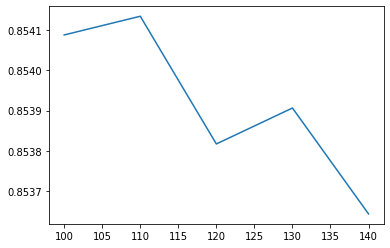

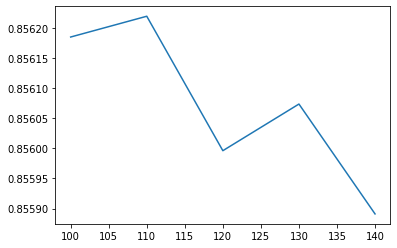

In [17]:
for v in res.values():
    plt.plot(n_neighbors, v)
    plt.show()